In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visa = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
type = dict(visa.dtypes)

cat_col = [ key for key,value in type.items() if value == 'object']
num_col = [ key for key,value in type.items() if value == 'object']

cat_col = visa.select_dtypes(include = 'object')
num_col = visa.select_dtypes(exclude = 'object')

**Bi veriate analysis**

- We already seen Uni veriate analysis
- we performed the categorical columns analysis
    - freaquency table (value counts)
    - Bar chart
    - Relative frequecny table(value counts normalized form)
    - Pie chart
- performed the numerical column analysis
    - Histogram
    - Distribution plot
    - Box plot
    - outlier analysis
    - Filling the outlier

- Now we will do categorical analysis
- numerical - Numerical analysis
- Categorical - Numerical analysis

**Categorical to Categorical columns**

- Lets consider two columns
    - Continent
    - Case Status

In [4]:
# Continent 
visa['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**
- Find the certified observations continent wise
- Find the Denined observation continent wise

In [26]:
con1 = visa['continent'] == 'Asia'
con2 = visa['case_status'] == 'Certified'
con3 = con1 & con2
len(visa[con3])

11012

In [7]:
# continents = visa['continent'].unique()
# ceritifed_list = []
# denied_list = []
# for i in continents:    
#     con1 = visa['continents']==i
#     con2 = visa['case_status'] == 'Certified'
#     con3 = visa['case_status'] == 'Denined'
#     cert_con = con1 & con2
#     deni_con = con1 & con3
#     cert_count = len(visa[cert_con])
#     deni_count = len(visa[deni_con])
#     print(f'The number of certified visa from {i} is : {cert_count} ')
#     print(f'The number of Deniend visa {i} is : {deni_count}')
#     ceritifed_list.append(cert_count)
#     denied_list.append(deni_count)

In [8]:
# certified_list =[]
# cols = ['continents','Certified']
# df = pd.Dataframe(zip(continents,Certified),
#                  columns = cols)

**Cross tab**

- The above dataframe we can make by using a method : **cross tab**
- It is available in pandas
- It takes two agruments
    - index
    - columns

- In above dataframe index column is : **continent**
- In above dataframe data column is : **Case status**

In [9]:
idx_column = visa['continent']
data_column = visa['case_status']

df = pd.crosstab(idx_column,data_column)
df

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

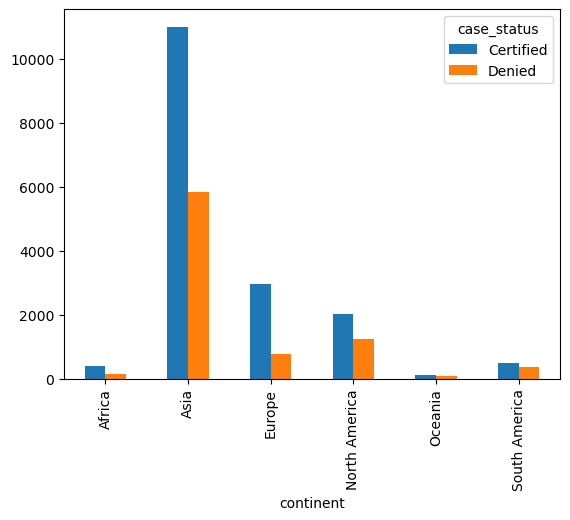

In [10]:
df.plot(kind = 'bar')

**Multivariate analysis**
- Education
- continent
- case stauts
- we alreay know from Aisa there 11k accepted visa
- In that i want further break down on education
- here also pd.crosstab
    - first fix your index of any one column out of three column
    - then keep two column in a list and pass as data column

In [11]:
idx_column = visa['continent']
data_column = [visa['education_of_employee'],
               visa['case_status']]
df1 = pd.crosstab(idx_column,data_column)
df1

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

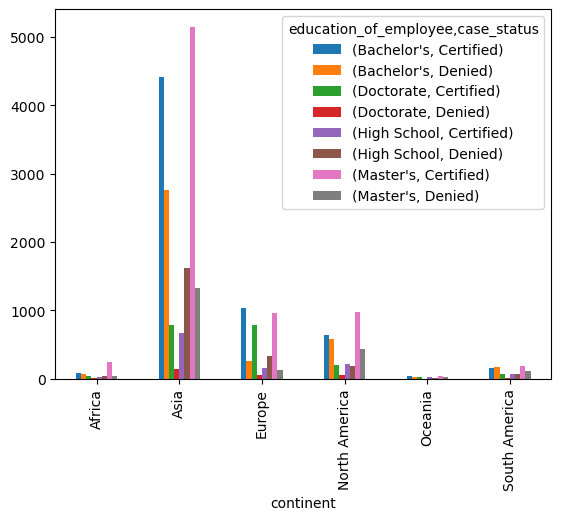

In [12]:
df1.plot(kind = 'bar')

**Numerical vs Numerical**

- To understand Numerical columns relation we need to plot scatter plots
- Scatter plots gives the relation between two numerical columns
- Bar chart - Pie chart - histogram - scatter plot
- Scatter plot under the **Matplotlib package**
- That is **plt.scatter**

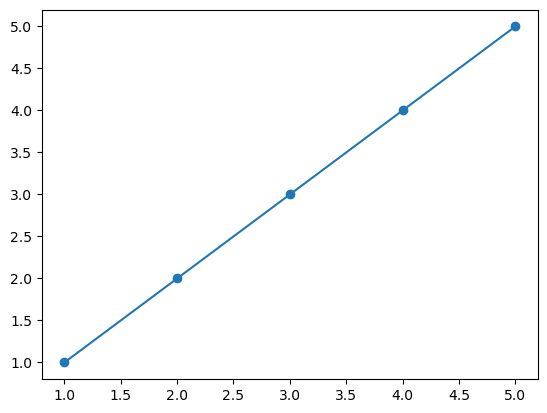

In [13]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

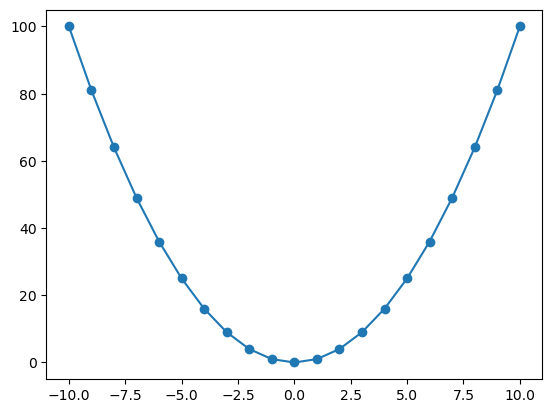

In [14]:
x = [ i for i in range(-10,11)]
y = [ i*i for i in x ]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

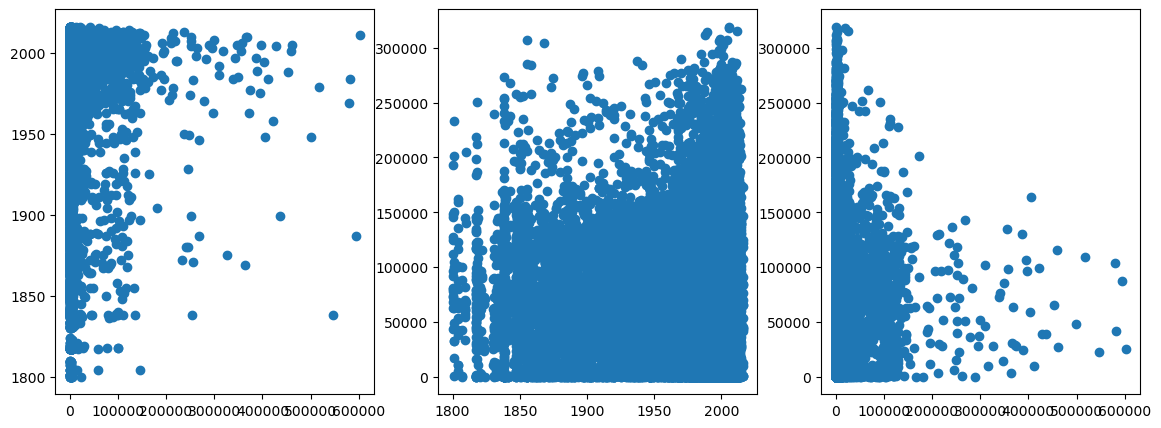

In [15]:
# Step-1 : read one numerical column
# Step-2 : read second numerical column
# And apply the scatter plot
x = visa['no_of_employees']
y = visa['yr_of_estab']
z = visa['prevailing_wage']

plt.figure(figsize = (14,5))
plt.subplot(1,3,1).scatter(x,y)
plt.subplot(1,3,2).scatter(y,z)
plt.subplot(1,3,3).scatter(x,z)
plt.show()

**Co-variance vs Co-relation**

- Covariance will tell about the columns have relation or not
- Covariance will explain about the relation status
    - positive relation 
    - negative relation 
    - no relation 

- Co-relation tells about how much relation between two variable
    - It dnotes with 'r'
    - r varies from -1 to 1
    - -1 to 0 indicates negative relation quantity
    - 0 to 1 indicates positive relation quantity
    - 0 indicates no relation 

**Method name : corr**

In [16]:
corr_data = visa.corr(numeric_only = True)
corr_data

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- Heat map is one of the important Visualization method to show the martix form of the
- It under **Seaborn pacakage**
- In every matrix we have heighest values and lowest value available
- Heat map will give color visaulation
- Also it provied color bar which color indicates which value

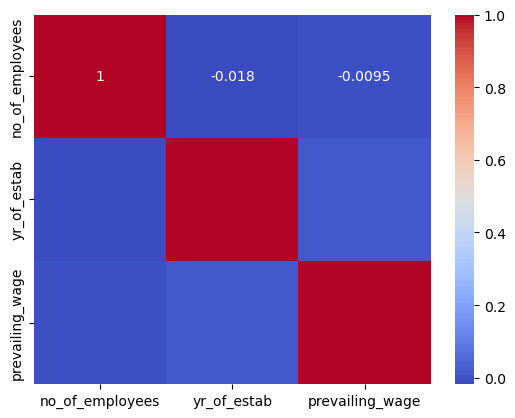

In [17]:
sns.heatmap(corr_data,annot = True,
           cmap = 'coolwarm')
plt.show()

- By seeing the Graphs we might not say the relation status
- It is best pratice get the package of relation using Co-relation
- All 3 columns having approximately zero percentage of relation
- Which indicates all the columns having no reltion
- No relation means independent each other
- In ML we expect the input columns should be independent each
- corr method gives matrix view
- If we have 3 column means 9 fildes
- If a data has 20 columns then 20*20 total 400 files
- Thats why always go with Heat map Visualization 

In [ ]:
# I want to apply the map method for all categorical columns
# Step-1: we need to get unique labels
# Step-2: We need to get a numbers = len unique labels
# Step-3: weneed to create a dictionary

In [ ]:
# {key: value for key,value in zip(unique_labels,list1)}

In [25]:
unique_labels = sorted(visa['case_status'].unique())
list1 = [ i for i in range(len(unique_labels)) ]
dict1 = dict(zip(unique_labels,list1))
dict1

visa['case_stauts'] = visa['case_status'].map(dict1)
visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_stauts
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0


In [32]:
visa_df = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
cat_col = visa_df.select_dtypes(include = 'object').columns
for i in cat_col:
    unique_labels = sorted(visa[i].unique())
    list1 = [ i for i in range(len(unique_labels)) ]
    dict1 = dict(zip(unique_labels,list1))
    dict1
    
    visa_df[i] = visa[i].map(dict1)
    visa_df

In [35]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


**LabelEncoder**

- LabelEncoder is a method to convert categorical data to Numerical data
- LabelEncoder is a same way how we did in the above
- The for loop map method we explpored
- But the LabelEncoder aslo do the same
- It is under **sickit-learn** we usually called as **sklearn**
- Under skleran we have class called as preprocessing
- Because currently we are doing data preprocessing
- Under Preprocessing calss we have a method called as **LabelEncoder**
- sklearn
    - preprocessing
    - LabelEncoder
 
- Any sklearn package has 3 steps
    - Step-1: Read the package
    - Step-2: Save the package
    - Step-3: Apply fit transform on data

In [36]:
visa_df = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")

In [38]:
# Step-1 : Read the package
from sklearn.preprocessing import LabelEncoder

# Step-2 : Save the package/ call the method
le = LabelEncoder()

# Step-3 : Apply fit transform on data
visa_df['case_status'] = le.fit_transform(visa_df['case_status'])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


In [40]:
# for the all categorical columns

from sklearn.preprocessing import LabelEncoder
visa_df = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
cat_col = visa_df.select_dtypes(include = 'object').columns
le = LabelEncoder()
for i in cat_col:
    visa_df[i] = le.fit_transform(visa[i])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


**fit and transform**
- Fit means develop the application
- transform means the process the logic
- If we observe in map method first we deveploped dictionary logic
- then we apply that dictionary to columns
- Developing the dictionary is kind of fit
- Apply the dictionary to columns means we are transforming the data categorical to numerical
- Whenever we are transforming or changing the data then use **fit transform**
- If we are not changing the data then only **fit**

**np.where**
- Using np.where also we can change the categorical datato Numerical
- But np.where is only for binary condition
- np.where is same as if-else
- if condition is True : will apply true value
- if condition is False will : apply false value
- so np.where use for only binary labels
- A columns should have only two unique labels

In [41]:
# value == 'certified' replace with 0
# otherwise 1
visa_df = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
con = visa_df['case_status'] == 'Certified'
visa_df['case_status'] = np.where(con,0,1)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


**One hot Encoder**
- One hot means if one will be ON, another will be OFF
- ON represent with 1
- OFF represent with 0
- for example : case status has two unique labels
    - Certified
    - Denied
- One hot encoder new columns which is equal to number of unique labels
- for ex : case status will create two new extra columns
    - case_status_Certified
    - case_status_Denied

|case status|case_status_certified|case_status_denied|
|-|-|-|
|Denied|0|1|
|Certified|1|0|
|Denied|0|1|

